In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_dir= "C:\\Users\\JSH\\Machine Learning\\Image Classification\\dataset"

In [3]:
categories= ["cats","dogs"]

for categorie in categories:
    for file in os.listdir(os.path.join(data_dir,categorie)):
        image_path= os.path.join(data_dir,categorie,file)
        print(image_path)

C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.10.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.100.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1000.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1001.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1002.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1003.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1004.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1005.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1006.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1007.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1008.jpg
C:\Users\JSH\Machine Learning\Image Clasification\dataset\cats\cat.1009.jpg
C:\Users\JSH\Machi

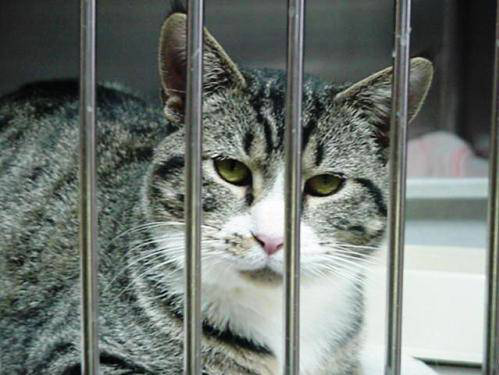

In [4]:
Image.open("C:\\Users\\JSH\\Machine Learning\\Image Classification\\dataset\\cats\\cat.17.jpg")

In [5]:
data= []
labels= []

for index, category in enumerate(categories):
    for file in os.listdir(os.path.join(data_dir,categorie)):
        image_path= os.path.join(data_dir,categorie,file)
        img= imread(image_path)
        img= resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(index)

In [6]:
data= np.asarray(data)
labels= np.asarray(labels)

### Model Building

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.25, random_state= 17,stratify= labels)

In [28]:
scalar = StandardScaler()
scalar.fit_transform(x_train)
scalar.fit_transform(x_test)

array([[ 1.3893942 ,  1.07496814,  0.79144535, ...,  0.41843097,
         0.03878561, -0.33351345],
       [-0.18808403,  0.06480252,  0.1213697 , ..., -0.75557336,
        -0.45299868, -0.4795919 ],
       [ 0.11003418, -0.16915721,  0.1566741 , ...,  0.12792576,
        -0.42022447, -0.26558431],
       ...,
       [ 0.62042647,  0.29852394,  0.06415623, ..., -0.55378259,
        -0.28432765, -0.06393067],
       [-0.44674414, -0.65783222, -0.68621849, ...,  0.17045444,
        -0.0580929 , -0.11860733],
       [ 1.29393047,  1.12766751,  1.08257402, ...,  1.61378062,
         1.48321506,  1.46024423]])

#### Logistic regression 

In [29]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_train_pred= lr.predict(x_train)
Logistic_regression_accuracy_score_train= accuracy_score(y_train,y_train_pred)
print("\t accuracy_score -train data :",Logistic_regression_accuracy_score_train )

	 accuracy_score -train data : 0.5408637873754153


In [31]:
y_test_pred= lr.predict(x_test)
Logistic_regression_accuracy_score_test= accuracy_score(y_test,y_test_pred)
print("\t accuracy_score -test data :",Logistic_regression_accuracy_score_test )

	 accuracy_score -test data : 0.37744121163810285


####  Decision Tree

In [32]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_train_pred= dt.predict(x_train)
DecisionTree_accuracy_score_train= accuracy_score(y_train,y_train_pred)
print("\t accuracy_score -train data :",DecisionTree_accuracy_score_train )

	 accuracy_score -train data : 0.6259136212624584


In [34]:
y_test_pred= dt.predict(x_test)
DecisionTree_accuracy_score_test= accuracy_score(y_test,y_test_pred)
print("\t accuracy_score -test data :",DecisionTree_accuracy_score_test )

	 accuracy_score -test data : 0.1223595057791949


#### Random Forest 

In [35]:
rf= RandomForestClassifier(n_estimators= 1000)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [36]:
y_train_pred= rf.predict(x_train)
random_forest_accuracy_score_train= accuracy_score(y_train,y_train_pred)
print("\t accuracy_score -train data :",random_forest_accuracy_score_train )

	 accuracy_score -train data : 0.6259136212624584


In [37]:
y_test_pred= rf.predict(x_test)
random_forest_accuracy_score_test= accuracy_score(y_test,y_test_pred)
print("\t accuracy_score -test data :",random_forest_accuracy_score_test )

	 accuracy_score -test data : 0.1223595057791949


###### Hyper parameter Tuning

In [40]:
from sklearn.model_selection import RandomizedSearchCV

model= RandomForestClassifier(random_state= 17)

In [42]:
params= {'n_estimators': [200, 400, 600, 800, 1000],
        'max_features': ['auto','sqrt','log2'],
        'max_depth': [2,4,6,7,8],
        'criterion': ['entropy','gini']
        }

In [46]:
rf_ht= RandomizedSearchCV(estimator= model, param_distributions= params, cv= 5)
rf_ht.fit(x_train,y_train)
rf_ht.best_params_

{'n_estimators': 1000,
 'max_features': 'log2',
 'max_depth': 2,
 'criterion': 'gini'}

In [50]:
tuned_model= RandomForestClassifier(n_estimators= 1000, max_features= 'log2', max_depth= 2, criterion= "gini")
tuned_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_features='log2', n_estimators=1000)

In [51]:
y_train_pred= tuned_model.predict(x_train)
random_forest_accuracy_score_train= accuracy_score(y_train,y_train_pred)
print("\t accuracy_score -train data :",random_forest_accuracy_score_train )

	 accuracy_score -train data : 0.5379401993355482


In [52]:
y_test_pred= tuned_model.predict(x_test)
random_forest_accuracy_score_test= accuracy_score(y_test,y_test_pred)
print("\t accuracy_score -test data :",random_forest_accuracy_score_test )

	 accuracy_score -test data : 0.3862096452770028
